<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/Tensorflow_Syntax_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np

import seaborn as sns

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning-Datasets/main/fake_reg.csv')

In [133]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

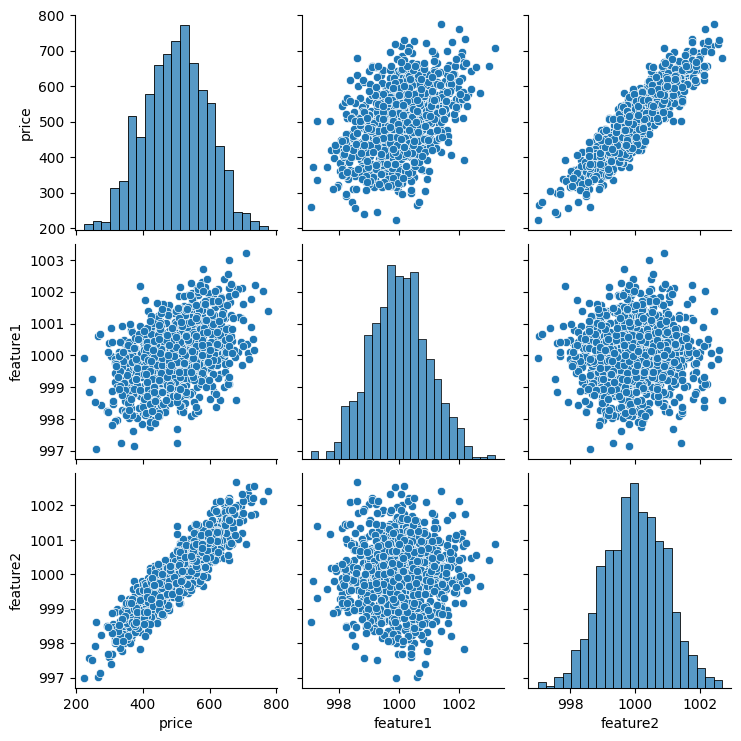

In [134]:
sns.pairplot(df)

In [135]:
X = df.drop('price',axis=1).values

In [136]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [137]:
y = df['price'].values

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [140]:
X_train.shape

(700, 2)

In [141]:
X_test.shape

(300, 2)

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Explanation of MinMaxScaler
help(MinMaxScaler)

In [144]:
scaler = MinMaxScaler()

In [145]:
X_train = scaler.fit_transform(X_train)

In [146]:
X_test = scaler.transform(X_test)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Documentation of Sequential
help(Sequential)

In [149]:
#2 Ways of creating Sequential Model
#Method 1
model = Sequential([Dense(4,activation = 'relu'),
                    Dense(2,activation = 'relu'),
                    Dense(1)])

In [150]:
#Method 2
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

In [151]:
model.compile(optimizer='rmsprop',loss='mse')

In [152]:
model.fit(x = X_train,y = y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 259099.2031
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 259040.2344
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 258985.4219
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 258924.9219
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 258856.0156
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 258777.7812
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 258689.8281
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 258590.4531
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 258478.6562
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 258354.0312
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 258214.5781
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [153]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

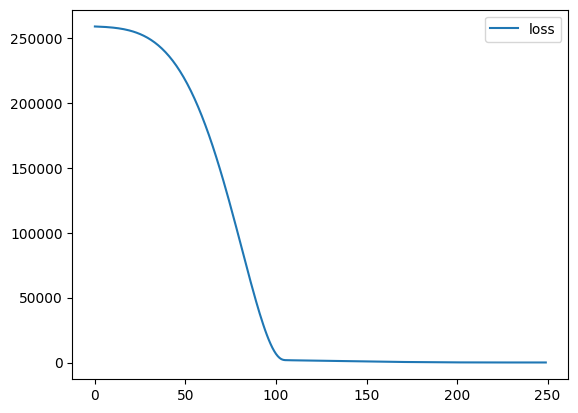

In [154]:
loss_df.plot()

In [155]:
model.evaluate(X_test,y_test,verbose=0)

27.664772033691406

In [156]:
model.evaluate(X_train,y_train,verbose=0)

23.39907455444336

In [157]:
test_prediction = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [158]:
test_predictions = pd.Series(test_prediction.reshape(300,))

In [159]:
test_predictions

0      654.143799
1      511.568848
2      518.440552
3      485.056091
4      541.507446
          ...    
295    369.882965
296    637.008606
297    395.123230
298    584.004395
299    511.488770
Length: 300, dtype: float32

In [160]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [161]:
pred_df.head()

Test True Y
0   655.391403
1   511.366708
2   515.778446
3   478.358238
4   543.830279

In [162]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [163]:
pred_df.head()

Test True Y           0
0   655.391403  654.143799
1   511.366708  511.568848
2   515.778446  518.440552
3   478.358238  485.056091
4   543.830279  541.507446

In [164]:
pred_df.columns = ['Test True Y','Model Predictions']

In [165]:
pred_df.head(2)

Test True Y  Model Predictions
0   655.391403         654.143799
1   511.366708         511.568848

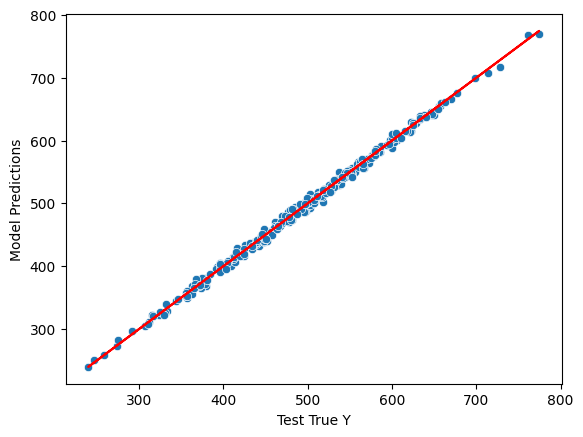

In [166]:
import matplotlib.pyplot as plt
sns.scatterplot(x = 'Test True Y',y='Model Predictions',data = pred_df)
plt.plot(y_test,y_test,'r')

In [167]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [168]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.223728357696907

In [169]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [170]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

27.66477300353103

In [171]:
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

5.2597312672351455

In [188]:
new_gem = [[999,1000]]

In [189]:
new_gem = scaler.transform(new_gem)

In [190]:
#Predicted Value
model.predict(new_gem)

1/1 [==============================] - 0s 24ms/step


array([[459.49353]], dtype=float32)

In [191]:
from tensorflow.keras.models import load_model

In [192]:
model.save('my_gem_model.h5')

In [193]:
later_model = load_model('my_gem_model.h5')

In [194]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 64ms/step


array([[459.49353]], dtype=float32)